# Twitter Data Extraction 

Module Code: **CS3PP19**

Assignment Report Title: **Twitter Data Extraction**

Student Numbers: **28010336, 28012606, 28006461**

Date Completed: **/11/2021** 

Actual hours spent for the assignment: **7 hours**

Assignment evaluation (3 key points):  
1. 
2. 
3.

# Introduction

In this data analysis task, we will analyse 3 selected Twitter accounts. Task 1; we data from twitter regarding, processing it into Pandas dataframes along with cleansing them down to crtical data only to reduce the size of our dataset. Task 2 merges all the data from the accounts and performs an explroatory data analysis (EDA) on the conjoined data in order to examine their characteristics. Specifically, we intend to analyse the following:

- Follower to following ratio (including the individual counts of each) plotted as a percentage bar of the ratio
- Activity share (status updates, retweets, favourites) represented as a piechart
- Most popular mentions
- Number of accounts that they are following
- Number of followers
- Number of original tweets that were posted
- Number of likes that each original tweet has
- Number of times that each original tweet have been retweeted
- Number of retweets that were posted by the user
- Number of tweets that the users have liked

Finally, task 3 will create a bi-directional graph of each account's area of influence - consituted of their followers and followings.

# Task 1 - Data Gathering and Pre-processing

In [1]:
accounts = ["iJustine", "BarackObama", "LeoDiCaprio"]

## API connection

Using Tweepy, we use our twitter developer account’s credentials to authorise it’s usage and create an instance of the Tweepy API.

https://docs.tweepy.org/en/stable/auth_tutorial.html

In [2]:
import tweepy

bearer = 'AAAAAAAAAAAAAAAAAAAAANiSVwEAAAAAaKxCBHUoe37A5VmVITnP%2FVQXtus%3DH71897v17xZqYvlc5Qh5uLHbpSyvaLGIElaBvBaPXGtI3tmMWP'

client = tweepy.Client(bearer_token=bearer, wait_on_rate_limit=True)


Store user account references in a list

https://docs.tweepy.org/en/stable/api.html#tweepy.API.get_user

In [3]:
users = client.get_users(
    usernames="iJustine,BarackObama,LeoDiCaprio", 
    user_fields=['id', 'name', 'public_metrics', 'created_at']
).data

## Data extraction

In the data extraction stage, we define and select the data we require for our analysis; for us, we define this as a set of API calls and selecting the raw data from which we will use - reducing the size our dataset(s).

In order to obtain the following list, we searched the api documentation of Tweepy (https://docs.tweepy.org/en/stable/api.html) and sought at methods which can acquire useful data of an account. These methods are:
- Friends - get_friends()
- Followers - get_followers()
- Posts - user_timeline()
- Retweets - get_retweets(), get_retweets_of_me()
- Likes - get_favourites()

**Should this only be in task 2's explanation, to not have duplication and because some of this data requires processing, thus now raw data?**

The list below shows all the raw data that we will be extracting from the accounts:
- Number of accounts that they are following. - Following Count
- Number of followers. - Follower count
- Number of original tweets that were posted. - Original tweet count
- Number of likes that each original tweet has. - original tweet like count
- Number of times that each original tweet have been retweeted. - original tweet retweet count
- Number of retweets that were posted by the user. - retweet count


- Number of tweets that the users have liked.


- Number of times that the accounts were mentioned.


In [4]:
import pandas as pd
import json

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)

# https://developer.twitter.com/en/docs/twitter-api/rate-limits

class RawUserData:
    
    MAX_TWEETS = 300
    MAX_FOLLOWERS = 100
    MAX_FOLLOWING = 100
    
    # User information
    userID = None
    username = None # The username of the account this UserData represents
    dateJoined = None # The date the account was created
    
    # Metrics
    followingCount = None # The number of people this account follows
    followersCount = None # The number of people following this account
    tweetCount = None # The number of tweets this account has made
    likesCount = None # The number of likes the account has done
    retweetCount = None # The number of retweets the account has done
    mentionCount = None # The number of times this account has mentioned someone/something in a tweet
    
    # User activity
    tweets = [] # The tweets this account has made (original tweets)
    
    # Network
    followers = [] # The followers the account has
    following = [] # The friends the account has
    
    def __init__(self, user):
        
        self.userID = user.id
        self.name = user.name
        self.followingCount = user.public_metrics['following_count']
        self.followersCount = user.public_metrics['followers_count']
        self.tweetCount= user.public_metrics['tweet_count']
        self.likesCount = user.public_metrics['tweet_count']
        self.dateJoined = user.created_at.strftime('%d-%m-%Y')
        
        self.tweets = self.paginate(client.get_users_tweets, self.MAX_TWEETS)
                
        self.followers = self.paginate(client.get_users_followers, self.MAX_FOLLOWERS)
        self.following = self.paginate(client.get_users_following, self.MAX_FOLLOWING)

    def display(self):        
        print(f"{self.name}:\n"
              f"\t- Friends: {self.followingCount}\n"
              f"\t- Followers: {self.followersCount}\n"
              f"\t- Tweets: {self.tweetCount}\n"
              f"\t- Likes: {self.likesCount}\n"
              f"\t- Data Joined: {self.dateJoined}\n"
              f"\t- Retrieved {len(self.tweets)} tweets")

    def paginate(self, method, maxCount):
        return [tweet for tweet in tweepy.Paginator(
            method, 
            id=self.userID,
            tweet_fields=['id', 'author_id', 'text', 'entities', 'created_at', 'public_metrics'],
            max_results=100)
        .flatten(limit=maxCount)] # Might have to say the max count here again
    

## Data cleaning
*From the selected data, we resolve any missing values, duplicated occurences, etc.*

In preperation for the next stage of pre-processing of the data.

This step is crucial in ensuring the resultant final information extracted is accurate and reliable. Furthermore, cleaning the data extracted allows for pre-processing to be a simpler and more reliable process as duplicate or missing values are resolved.

In [5]:
# Go through each account extracting the required data and their raw contents as a UserData object
rawUserData = [RawUserData(user) for user in users]

In [6]:
for rawData in rawUserData:
    rawData.display()
    

iJustine:
	- Friends: 2724
	- Followers: 1796169
	- Tweets: 60457
	- Likes: 60457
	- Data Joined: 10-10-2006
	- Retrieved 300 tweets
Barack Obama:
	- Friends: 588012
	- Followers: 130296930
	- Tweets: 16314
	- Likes: 16314
	- Data Joined: 05-03-2007
	- Retrieved 300 tweets
Leonardo DiCaprio:
	- Friends: 235
	- Followers: 19413381
	- Tweets: 2482
	- Likes: 2482
	- Data Joined: 16-04-2010
	- Retrieved 300 tweets


In [7]:
# Now clean this data
# If a tweet has no hashtags, ensure it's initialised empty list, not an unknown value, and the same for mentions, likes, etc.
# Format the date in the same way for all uses of date

## Data pre-processing
The pre-processing stage of data extraction requires the selected raw data be prepared for analysis. To do so, we transform the cleaned raw data into Pandas data frames which can be done almost directly as the data was cleaned in the previous stage.

*Note: A account's followers ar*

For an account:

**Account**

A user is represented by their user ID. 

A user entry stores their account name, join date, and their friends and followers' IDs

| ID | Account Name | Date Joined | Follower IDs | Friend IDs |
| -- | ------------ | ----------- | ------------ | ---------- |

**Status**

A status is index'd by a composite key, made up ofa pimary unique ID (tweet_id) and a secondary shared ID with the account that made the status.

Mentions and hashtags are a CSV list of account ID's or plain text repsectively.

Likes and retweets are foriegn keys into their respective Pandas dataframes.

A status can be a tweet, retweet or favourite (like)

| ID | Account ID | Text | Mentions | Hashtags | Likes | Retweets | Comments | Date | Type |
| -- | ---------- | ---- | -------- | -------- | ----- | -------- | -------- | ---- | ---- |



In [8]:
# Take the RawUserData of an account and transform it into Pandas dataframes

class TweetType:
    
    ORIGINAL = 1
    REPLY = 2
    RETWEET = 4
    QUOTE = 8
    
    mask = 0
    
    def __init__(self, isReply, isRetweet, isQuote):
        self.mask |= (isReply << 1)
        self.mask |= (isRetweet << 2)
        self.mask |= (isQuote << 3)
        
        if self.mask == 0:
            self.mask = self.ORIGINAL

class Dataset:
    
    rawData = None
    
    accountFrame = pd.DataFrame(columns=["account_id", "name", "dateJoined", "follower_ids", "friend_ids"])
    statusFrame = pd.DataFrame(columns=["status_id", "account_id", "text", "mentions", "hashtags", "likes", "retweets", "comments", "date", "type"])
    
    accountFrame.set_index("account_id")
    statusFrame.set_index(["status_id", "account_id"])
            
    def addAssociatedAccounts(self, rawUser):
        
        followerIDs = []
        friendIDs = []
        
        for follower in rawUser.followers:

            # If account is already added, skip
            if(follower.id in self.accountFrame.account_id):
                continue
            
            followerIDs.append(follower.id) # Add follower to the user's follower's ID list
            
            self.addAccountFromUser(follower)
            
        for friend in rawUser.following:
            
            # If account is already added, skip
            if(friend.id in self.accountFrame.account_id):
                continue
            
            friendIDs.append(friend.id) # Add friend to the user's friend's ID list
 
            self.addAccountFromUser(friend)
            
            
        # Return tuple of follower and friend IDs that were added
        return (followerIDs, friendIDs)

    def addAccountFromData(self, accountData):
        self.accountFrame = self.accountFrame.append(accountData, ignore_index=True)
      
    def addAccountFromUser(self, user):       
        accountData = {
            "account_id": user.id,
            "name": user.name,
            "dateJoined": None,#user.created_at.strftime('%d-%m-%Y'),
            "follower_ids": None, 
            "friend_ids": None
        }
        
        self.addAccountFromData(accountData)

    def addStatus(self, statusData):
        self.statusFrame = self.statusFrame.append(statusData, ignore_index=True)
    
    def __init__(self, userData):
        self.rawData = userData

        # For all user data extracted
        for data in self.rawData:
            
            # First add their friend's and follower's accounts and save their IDs
            associatedUsers = self.addAssociatedAccounts(data)
            
            # Configure insertion data
            accountData = {
                "account_id": data.userID,
                "name": data.name,
                "dateJoined": data.dateJoined,
                "follower_ids": associatedUsers[0], 
                "friend_ids": associatedUsers[1]
            }
            
            # Add user account and their friend and follower's IDs
            self.addAccountFromData(accountData)
                        
            # For all statuses this account has made
            for tweet in data.tweets:
                
                #print(type(tweet))
                #print(tweet.in_reply_to_user_id)
                #print(hasattr(tweet, 'retweeted_status'))
                #print(hasattr(tweet, 'is_quote_status'))
                
                # Configure status data
                statusData = {
                    "status_id": tweet.id,
                    "account_id": tweet.author_id, 
                    "text": tweet.text, 
                    "mentions": self.getEntityAttributes(tweet.entities, 'mentions', 'username'), 
                    "hashtags": self.getEntityAttributes(tweet.entities, 'hashtags', 'tag'), 
                    "likes": tweet.public_metrics['like_count'], 
                    "retweets": tweet.public_metrics['retweet_count'], 
                    "reply": tweet.public_metrics['reply_count'],
                    "date": tweet.created_at.strftime('%Y %m %d')
                }
                                
                self.addStatus(statusData)
            
    def getEntityAttributes(self, entities, entityKey, attributeKey):
        if entities:
            if entityKey in entities:
                return [entity[attributeKey] for entity in entities[entityKey]]
        
        return []
            
dataset = Dataset([rawUser for rawUser in rawUserData])

display(dataset.accountFrame)
display(dataset.statusFrame)


,account_id,name,dateJoined,follower_ids,friend_ids
0,1465089701476540417,Moses Areseb,None,None,None
1,1438994576115736579,BETTYBOOOPYS,None,None,None
2,1451474919699763232,Sherif,None,None,None
3,1463148473922904074,Tomas Kmetz,None,None,None
4,95229118,Smaran Kejriwal,None,None,None
5,846845168477196288,Taison Pham,None,None,None
6,1337496959641378817,shdw,None,None,None
7,1441150156049555461,Adam Javed,None,None,None
8,1348010424189538318,David rogelio Ramos meza,None,None,None
9,1452323542557675523,Hassan Raza,None,None,None


,status_id,account_id,text,mentions,hashtags,likes,retweets,comments,date,type,reply
0,1465091806287171584,7846,@RDRv3 Are they having a lottery for the boost...,[RDRv3],[],0,0,NaN,2021 11 28,NaN,0.0
1,1465091645217525765,7846,@perry_wes I found another one that was even b...,[perry_wes],[],0,0,NaN,2021 11 28,NaN,0.0
2,1465091435724640256,7846,@LizeyMay Hahaha there are actually 5 of them ...,[LizeyMay],[],0,0,NaN,2021 11 28,NaN,0.0
3,1465091316174372864,7846,@DigitalDvnprt @jennaezarik Haha honestly most...,"[DigitalDvnprt, jennaezarik]",[],0,0,NaN,2021 11 28,NaN,0.0
4,1465091197198733316,7846,@javajoint Hahahahahah,[javajoint],[],0,0,NaN,2021 11 28,NaN,0.0
5,1465091139623555076,7846,@RogueHunter65 @jennaezarik I feel better now,"[RogueHunter65, jennaezarik]",[],0,0,NaN,2021 11 28,NaN,0.0
6,1465000813986680834,7846,Jenna just told me I have a sickness..\n\n@jen...,[jennaezarik],[],1217,28,NaN,2021 11 28,NaN,64.0
7,1464995940809383939,7846,@ChekTek I know,[ChekTek],[],4,0,NaN,2021 11 28,NaN,0.0
8,1464995877353779204,7846,@TravisMcP Great point…,[TravisMcP],[],14,0,NaN,2021 11 28,NaN,0.0
9,1464988269943287809,7846,This tripod bag I never used for my tripod is ...,[],[],858,24,NaN,2021 11 28,NaN,24.0


# Task 2 - Exploratory Data Analysis (EDA)

Follower and following totals are plotted against eachother in a bar chart to display the differences between our three different type of influencer's accounts


## Metrics

- Number of accounts that they are following. - Following Count
- Number of followers. - Follower count
- Number of original tweets that were posted. - Original tweet count
- Number of likes that each original tweet has. - original tweet like count
- Number of times that each original tweet have been retweeted. - original tweet retweet count
- Number of retweets that were posted by the user. - retweet count

- Number of tweets that the users have liked.

## Analyses

- Percentage of activity on an account (favourites, comments, retweets) and if they are followed or not.
- Comparisions between accounts, i.e.:
 - Follower count
 - Following count
 - Original tweet count
 - Original tweet like count
 - Original tweet retweet count
 - Retweet count
 - Ratio between original and retweet counts
 


NameError: name 'values' is not defined

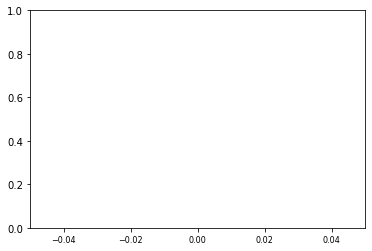

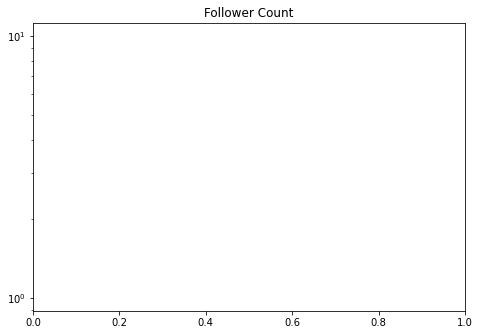

In [9]:
import matplotlib.pyplot as plt

plt.autoscale(enable=True, axis="x", tight=True)
plt.tick_params(axis='x', which='major', labelsize=8)
    
class DataSetAnalyser():
    
    ds = None # Dataset
    t = None # Target
    
    def __init__(self, dataset):
        self.ds = dataset
        
    def setTarget(self, accounts = None):
        if type(accounts) is not list:
            if accounts is None:
                self.t = [user.userID for user in rawUserData]
            else:
                self.t = [accounts]
            
        t = accounts
        
    def getMentions(self):        
        mentions = self.ds.statusFrame[self.ds.statusFrame["account_id"].isin(self.t) & self.ds.statusFrame["mentions"].astype(bool)]
                
        return mentions["mentions"].explode()
            
        
        
analysis = DataSetAnalyser(dataset)

# Follower counts
followerCountFig = plt.figure()
axFollowers = followerCountFig.add_axes([0,0,1,1])
axFollowers.set_title("Follower Count")
axFollowers.set_yscale('log')

labels = []
for i in range(0, len(accounts)):
    labels.append(f"{accounts[i]}\n{values[i]}")
values = [rawUserData[index].followersCount for index in range(len(rawUserData))]

axFollowers.bar(labels, values)
plt.show()

# Following counts
followingCountFig = plt.figure()
axFollowing = followingCountFig.add_axes([0,0,1,1])
axFollowing.set_title("Following Count")
axFollowing.set_yscale('log')

labels = []
for i in range(0, len(accounts)):
    labels.append(f"{accounts[i]}\n{values[i]}")
values = [rawUserData[index].followingCount for index in range(len(rawUserData))]
    
axFollowing.bar(labels, values)
plt.show()

# Function for plotting mention freuqnecies
def plotMentions(plot, userIndex):
    ax = plot.add_axes([0,0,1,1])
    ax.set_title(f"{accounts[userIndex]} Mention Count")

    analysis.setTarget(rawUserData[userIndex].userID)
    mentionCounts = analysis.getMentions().value_counts()
    index = 0
    for count in mentionCounts:
        if count == 1:
            break
        index+=1
    labels = mentionCounts.index[:index]
    values = mentionCounts[:index]

    ax.plot(labels, values)

plotMentions(plt.figure(), 0)
plotMentions(plt.figure(), 1)
plotMentions(plt.figure(), 2)
plt.show()

# Tweet counts
tweetCountFig = plt.figure()
axTweetCount = followingCountFig.add_axes([0,0,1,1])
axTweetCount.set_title("Tweet Count")

labels = []
for i in range(0, len(accounts)):
    labels.append(f"{accounts[i]}\n{values[i]}")
values = [rawUserData[index].tweetCount for index in range(len(rawUserData))]
    
axTweetCount.bar(labels, values)
plt.show()

# Tweet like hisotgram
likeHistogramFig = plt.figure()
axLikeHistogram = likeHistogramFig.add_axes([0,0,1,1])
axLikeHistogram.set_title("User's Like Hisotgram")

labels = []
for i in range(0, len(accounts)):
    labels.append(f"{accounts[i]}\n{values[i]}")
values = [rawUserData[index].tweetCount for index in range(len(rawUserData))]
    
axLikeHistogram.bar(labels, values)
plt.show()

# Task 3 - Network Analysis

For a given account, it has a bidrectional network of influence. That is, account A can interact with account B, but account B can also interact with account A.

Using NetworkX and the pre-processed PandasUserData information, we will create and explore a network of each account.


In [12]:
import networkx as nx

#Lists to store data from the Panda dataframe
lFollowingAcc = []
lRetweetCounts = []

def extractAccounts():
    #Extract all accounts that the influencers are following from the Panda dataframe
    lFollowingAcc.append(dataset.accountFrame.query('name == "iJustine"')['friend_ids'].iloc[0])
    lFollowingAcc.append(dataset.accountFrame.query('name == "Barack Obama"')['friend_ids'].iloc[0])
    lFollowingAcc.append(dataset.accountFrame.query('name == "Leonardo DiCaprio"')['friend_ids'].iloc[0])
    
    #Check if the friend ids are stored
    for s in lFollowingAcc:
        print(str(s) + "\n\n")

def extractRetweets():
    s
    
def createNetwork():
    print("hi")
    
extractAccounts()
extractRetweets()
createNetwork()

[2538267829, 1386694282996715522, 18007213, 820673148295192577, 3496641, 1090141, 834400338312564736, 1300495749478785026, 1413608544142721024, 14053116, 14661920, 50085192, 574032254, 59318218, 361384396, 3050707454, 1299965377355505666, 1573265498, 41777199, 1141757163045441536, 395514600, 41038781, 391037985, 23395456, 3289027731, 64931388, 134376725, 612076511, 544828911, 155768059, 18536658, 1118321164483473408, 308693201, 25694156, 490932793, 24871896, 168234688, 231534898, 300878069, 1102361186224336897, 1366471417181720578, 357267834, 2897431, 941091016731279361, 19202616, 898708204951031809, 17653553, 1076857425083408386, 281777578, 196066226, 1252051231331287049, 34442404, 956969150001197056, 146579141, 361871810, 1601374154, 48687278, 109058897, 732773, 16315757, 18530063, 19690116, 49573859, 831772091426930688, 18789373, 15101052, 16261861, 1064855894121476098, 22677790, 129330180, 10668202, 23326965, 17475575, 2709705650, 1334986258167173125, 101125149, 1156474406664888322